In [155]:

#!pip3 install prophet

### Importing necessary packages

In [156]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 

### Importing data and Performing EDA

In [157]:
df = pd.read_csv(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\TSA\FBprophet\nyc_energy_consumption.csv")
df.head()

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5     0.0  46.13
1  2012-01-01 01:00:00  4752.1     0.0  45.89
2  2012-01-01 02:00:00  4542.6     0.0  45.04
3  2012-01-01 03:00:00  4357.7     0.0  45.03
4  2012-01-01 04:00:00  4275.5     0.0  42.61

In [158]:
df.shape

(49205, 4)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [160]:
# Converting timestamp into Date format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [161]:
# Setting datetime index
df.set_index('timeStamp',inplace=True)
df.head()

demand  precip   temp
timeStamp                                 
2012-01-01 00:00:00  4937.5     0.0  46.13
2012-01-01 01:00:00  4752.1     0.0  45.89
2012-01-01 02:00:00  4542.6     0.0  45.04
2012-01-01 03:00:00  4357.7     0.0  45.03
2012-01-01 04:00:00  4275.5     0.0  42.61

In [162]:
# Visualising the data 
import plotly.express as px
fig = px.line(
    df,y='demand', title = 'Demand over time'
)
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons=
            list([
                dict(count=1,label='1Y', step='year',stepmode='backward'),
                dict(count=3,label='3Y',step='year',stepmode='backward'),
                dict(count=5,label='5Y',step='year',stepmode='backward'),
                dict(step='all')]
            
        )
    )
)
fig.show()

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

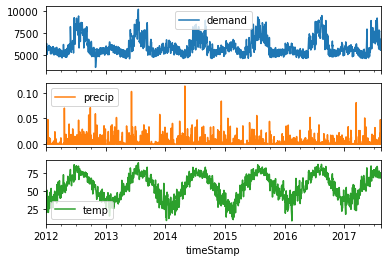

In [163]:
# Seasonality present in the data: Annual seasonality
# Resampling the data frame to Day level from hour level 
df_day_level = df.resample('D').mean()
df_day_level.plot(subplots=True)

### Implementing FBprophet model

#### FBprophet model requires data frame to contain date stamp in ds column and values in y column


In [164]:
# Restructuring the data as per the FBprophet requirement
df_day_level.reset_index(inplace=True)
df_fb = df_day_level[['timeStamp','demand']]
df_fb.columns = ['ds','y']
df_fb.head()

ds            y
0 2012-01-01  4954.833333
1 2012-01-02  5302.954167
2 2012-01-03  6095.512500
3 2012-01-04  6336.266667
4 2012-01-05  6130.245833

In [165]:
# Spliting the data into train and test sets
train = df_fb[(df_fb['ds']>='2012-01-01')& (df_fb['ds']<='2017-04-30')]
test = df_fb[df_fb['ds']>'2017-04-30']


In [166]:
print(train.shape)
train.tail()

(1947, 2)


ds            y
1942 2017-04-26  5342.687591
1943 2017-04-27  5445.442917
1944 2017-04-28  5648.995917
1945 2017-04-29  5467.143125
1946 2017-04-30  4855.954500

In [167]:
print(test.shape)
test.head()

(104, 2)


ds            y
1947 2017-05-01  5417.231583
1948 2017-05-02  5697.950042
1949 2017-05-03  5354.628500
1950 2017-05-04  5235.704833
1951 2017-05-05  5358.639500

In [168]:
# Importing fbprophet 
from prophet import Prophet


In [169]:
# Initializing the model
model = Prophet(yearly_seasonality=True,interval_width=0.95)

In [170]:
# Fitting the data
model.fit(train)

17:42:00 - cmdstanpy - INFO - Chain [1] start processing
17:42:00 - cmdstanpy - INFO - Chain [1] done processing


In [171]:
model.params

OrderedDict([('lp__', array([[5009.05]])),
             ('k', array([[0.0903474]])),
             ('m', array([[0.593158]])),
             ('delta',
              array([[ 1.57346e-08, -1.50055e-02, -8.27528e-02, -5.05999e-08,
                      -3.84036e-08, -1.42523e-08,  4.00088e-08, -1.19212e-07,
                      -1.28901e-07, -8.36251e-09, -5.59082e-02, -6.18697e-02,
                      -5.61727e-07, -6.34512e-08,  2.21891e-01,  5.65569e-02,
                      -1.86815e-05, -9.14801e-02, -8.33274e-02, -5.10391e-08,
                       9.34443e-09,  8.23929e-09,  2.57845e-02,  1.38103e-03,
                       2.03501e-07]])),
             ('sigma_obs', array([[0.0459472]])),
             ('beta',
              array([[-0.0347473 , -0.0705454 ,  0.0576256 ,  0.0470681 , -0.0140384 ,
                      -0.00499489, -0.00387022, -0.00073177,  0.00241572, -0.00755986,
                       0.0040557 ,  0.00483054, -0.00789372, -0.00470307,  0.00702001,
          

### Creating future data frame


In [172]:
future_df = model.make_future_dataframe(periods=104)
future_df.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

### Forecasting for future data 

In [173]:
future_forecast = model.predict(future_df)
#future_forecast = future_forecast[['yhat','yhat_lower','yhat_upper']]
future_forecast.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2012-01-01  6028.430344  4203.387933  6000.214899  6028.430344  6028.430344   
1 2012-01-02  6028.902197  4966.200374  6706.510131  6028.902197  6028.902197   
2 2012-01-03  6029.374050  4972.994077  6811.461212  6029.374050  6029.374050   
3 2012-01-04  6029.845903  4999.994233  6851.330055  6029.845903  6029.845903   
4 2012-01-05  6030.317756  4978.618861  6790.173850  6030.317756  6030.317756   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0     -930.087825           -930.087825           -930.087825 -541.081950   
1     -245.980395           -245.980395           -245.980395  133.884311   
2     -129.239276           -129.239276           -129.239276  240.797709   
3     -121.874176           -121.874176           -121.874176  237.724753   
4     -151.578423           -151.578423           -151.578423  197.056480   

   weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0   -541.081950   -541.081950 -389.005875   -389.005875   -389.005875   
1    133.884311    133.884311 -379.864706   -379.864706   -379.864706   
2    240.797709    240.797709 -370.036985   -370.036985   -370.036985   
3    237.724753    237.724753 -359.598929   -359.598929   -359.598929   
4    197.056480    197.056480 -348.634903   -348.634903   -348.634903   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  5098.342519  
1                         0.0  5782.921802  
2                         0.0  5900.134774  
3                         0.0  5907.971726  
4                         0.0  5878.739333

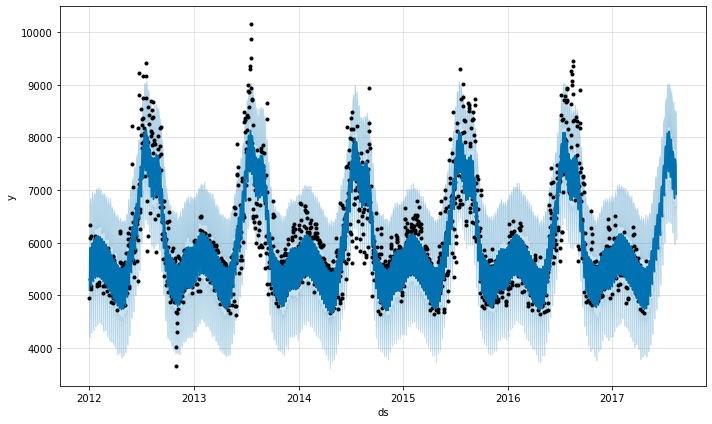

In [174]:
model.plot(future_forecast);

### Comparing the predicted values with previous historical data


In [175]:
concated_df = pd.concat([train.set_index('ds'),future_forecast.set_index('ds')['yhat']],axis=1)
concated_df.tail()

y         yhat
ds                         
2017-08-08 NaN  7593.235601
2017-08-09 NaN  7582.387933
2017-08-10 NaN  7537.141501
2017-08-11 NaN  7492.394047
2017-08-12 NaN  6917.609245

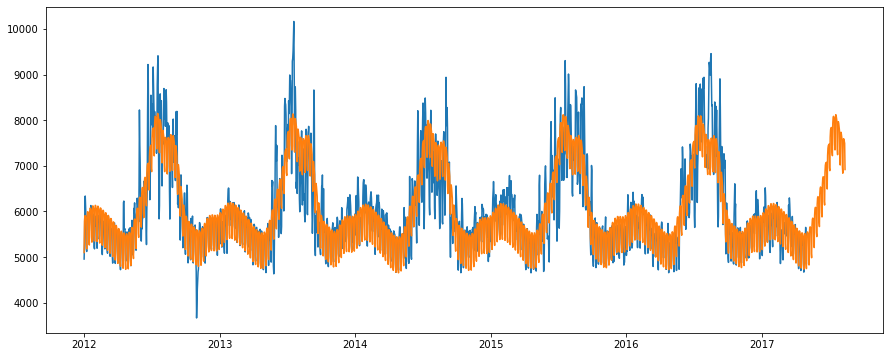

In [176]:
plt.figure(figsize=(15,6))
plt.plot(concated_df['y'])
plt.plot(concated_df['yhat'])

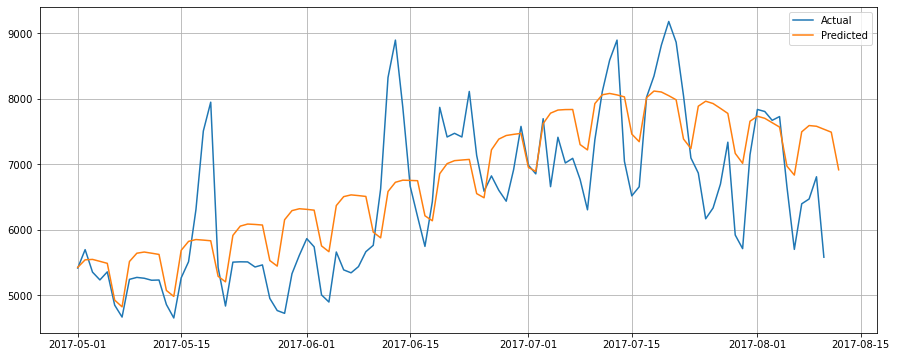

In [177]:
plt.figure(figsize=(15,6))
plt.plot(test.set_index('ds')['y'],label='Actual')
plt.plot(future_forecast.set_index('ds').loc['2017-05-01':'2017-08-12']['yhat'],label='Predicted')
plt.legend()
plt.grid()
plt.show()

### Observation: 
Model is not able to predict the sudden peaks in the data. This sudden peaks might be due to the influence of other factors. That can be studied in multivarint analysis of Time series.  

### Visualising the forcast components


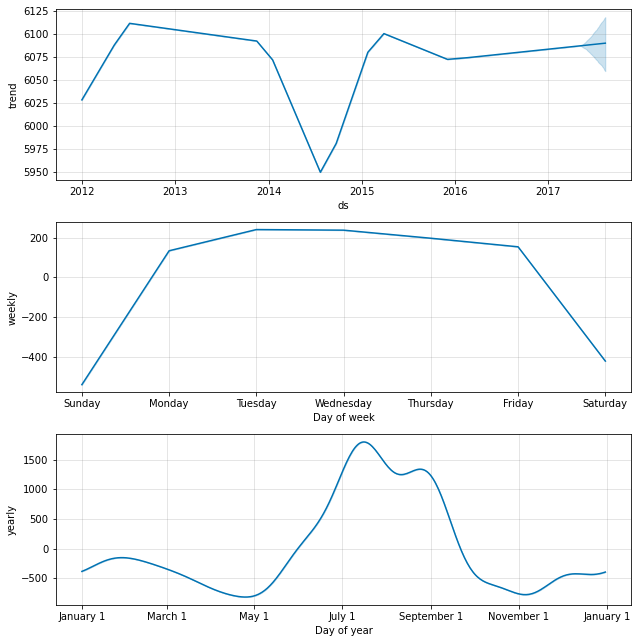

In [178]:
model.plot_components(future_forecast);

### Visualising in plotly 

In [179]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, future_forecast)

### Implementing cross validation

In [180]:
from prophet.diagnostics import cross_validation


In [181]:
cv_df = cross_validation(model,initial='800 days',horizon='365 days')
cv_df

  0%|          | 0/5 [00:00<?, ?it/s]

17:42:04 - cmdstanpy - INFO - Chain [1] start processing
17:42:04 - cmdstanpy - INFO - Chain [1] done processing
17:42:04 - cmdstanpy - INFO - Chain [1] start processing
17:42:05 - cmdstanpy - INFO - Chain [1] done processing
17:42:05 - cmdstanpy - INFO - Chain [1] start processing
17:42:05 - cmdstanpy - INFO - Chain [1] done processing
17:42:06 - cmdstanpy - INFO - Chain [1] start processing
17:42:06 - cmdstanpy - INFO - Chain [1] done processing
17:42:06 - cmdstanpy - INFO - Chain [1] start processing
17:42:07 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper            y     cutoff
0    2014-05-02  5564.184194  4745.440077  6434.181545  5460.325000 2014-05-01
1    2014-05-03  4974.309353  4137.971353  5822.333933  4893.683333 2014-05-01
2    2014-05-04  4850.530083  4034.051689  5641.252222  4764.137500 2014-05-01
3    2014-05-05  5531.546219  4694.933542  6415.486196  5406.762500 2014-05-01
4    2014-05-06  5626.587696  4749.995834  6404.597035  5409.750000 2014-05-01
...         ...          ...          ...          ...          ...        ...
1820 2017-04-26  5227.709705  4297.895609  6149.292144  5342.687591 2016-04-30
1821 2017-04-27  5180.429310  4277.322199  6107.131087  5445.442917 2016-04-30
1822 2017-04-28  5128.855868  4216.765063  6116.255511  5648.995917 2016-04-30
1823 2017-04-29  4553.397961  3584.415249  5478.331008  5467.143125 2016-04-30
1824 2017-04-30  4450.541602  3587.492837  5437.185629  4855.954500 2016-04-30

[1825 rows x 6 columns]

In [182]:
from prophet.diagnostics import performance_metrics
performance_metrics(cv_df)

horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  253156.932698  503.147029  408.071875  0.073380   
1    37 days 00:00:00  259873.738630  509.778127  415.435264  0.074661   
2    37 days 12:00:00  262214.738706  512.069076  418.857984  0.075251   
3    38 days 00:00:00  264971.466956  514.753793  421.945699  0.075513   
4    38 days 12:00:00  268702.979952  518.365682  427.211979  0.076355   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  262454.965119  512.303587  449.057124  0.082900   
654 363 days 12:00:00  264170.952155  513.975634  450.170416  0.083097   
655 364 days 00:00:00  268588.755478  518.255492  453.818129  0.083953   
656 364 days 12:00:00  268636.547531  518.301599  453.559657  0.083944   
657 365 days 00:00:00  264368.704975  514.167974  450.522339  0.083812   

        mdape     smape  coverage  
0    0.065677  0.072375  0.884615  
1    0.066356  0.073572  0.879121  
2    0.067512  0.074190  0.879121  
3    0.068710  0.074427  0.879121  
4    0.069194  0.075294  0.879121  
..        ...       ...       ...  
653  0.082472  0.081926  0.983516  
654  0.083638  0.082220  0.983516  
655  0.084952  0.083079  0.983516  
656  0.084952  0.083155  0.983516  
657  0.084952  0.082913  0.983516  

[658 rows x 8 columns]

In [184]:
performance_metrics(cv_df).mean()

horizon     200 days 18:00:00
mse             451800.059365
rmse               658.911663
mae                529.662975
mape                 0.084838
mdape                0.076046
smape                0.084289
coverage             0.844773
dtype: object